<a href="https://colab.research.google.com/github/Git-Nish14/virginia-airport-decision-support-tool/blob/main/Patel_Pitani_Hirst_DASC_620_Data_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Team Members**

Nish Mohindrakumar Patel : npate017@odu.edu | [Portfolio](https://nishpatel.dev) | UIN : **01276762**

Shashank Preetham Pitani : spita001@odu.edu | [Portfolio](https://shashank-200.github.io) | UIN : **01322655**

Townshend Hirst : thirs002@odu.edu | [Portfolio](https://thirs002.github.io) |  UIN : **01317118**

# Virginia Airport Decision Support Tool

---





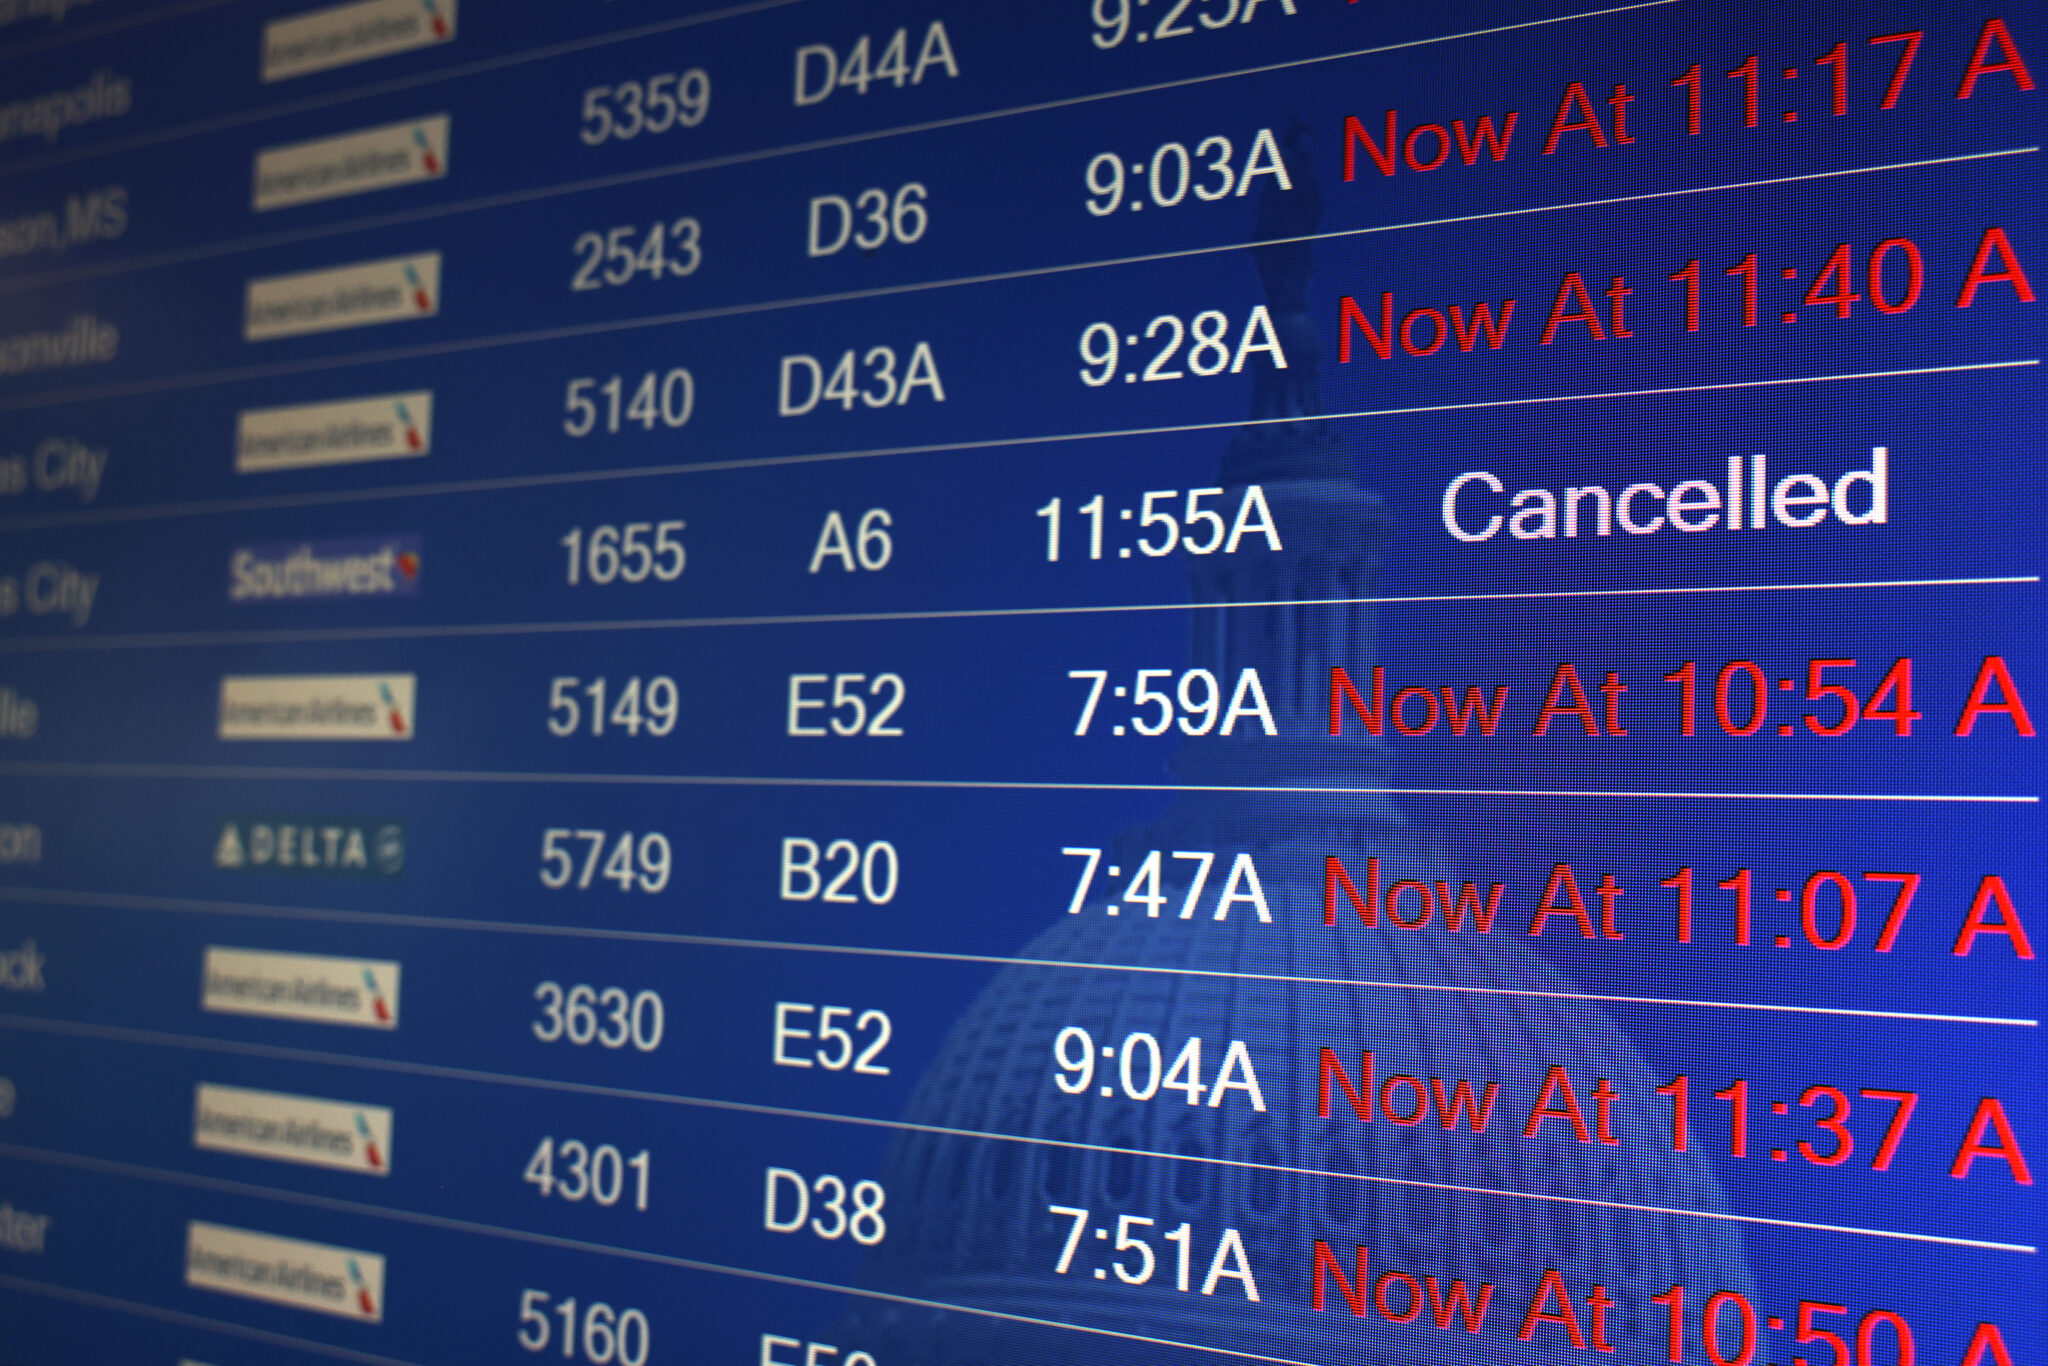

# Table of Contents
1. Abstract
2. Data Import and Cleaning    
3. Airport-Level Analysis  
4. Final Import / Regression Analysis
5. Delay Predictor & Recommendation Tool
6. Future Work / Conclusions
7. References  
8. Unused Exploratory Analysis


# **[YouTube Presentation](https://www.youtube.com/watch?v=C_iHPUxCrhY)**

##1. Abstract

The goal of this project is to create a model that uses historical arrival data to recommend the best airport and major airline based on a given month to avoid delays. Given the dynamic nature of aviation with unforecasted weather and Air Traffic Control (ATC) delays, this model will only consider historical data. In order to keep the scope manageable, the tool will focus solely on major airports (Reagan (DCA), Dulles (IAD), Richmond (RIC), and Norfolk (ORF) in Virginia with major air carriers (American Airlines, Delta Airlines, Southwest Airlines, United Airlines).

Ten years of aviation delay data spanning June 2015 through June 2025 has been accessed from [U.S. DOT](https://www.transtats.bts.gov/OT_Delay/OT_DelayCause1.asp). The data is provided through the website based on airport and individual carrier but will be analyzed on a broader scope.

### Target Audience
The data analysis throughout this project is designed for any traveler desiring the most efficient airport and airline for any given month to ensure the least arrival delay possible.

### Data Models & Tools
The project will use material learned throughout the course of DASC 620 to include data cleaning, regression analysis through models such as Random Forest, XGBoost, and SARIMAX all through packages in Python such as Scikit Learn.

### Project Design
Our project layout flows logically through our table of contents. Our project spanned an entire semester, and therefore the project continued to compile on itself. As a result, we structured our layout in such a way that reflects our stages of growth throughout the project. The precursory data import contains the building blocks on which we set up the models in the Final Import / Regression Analysis section. In most sections, we opted to go through a clean data import to ensure each model had it's necessary features.

### Project Plan
Meetings will take place before class (1:50 - 2:50) and scheduled zoom calls when necessary.
* 9/19: Conduct exploratory data analysis and understand the data. Identify constraints (i.e. date, time of day, delay cause). Sift through [U.S. DOT](https://www.transtats.bts.gov/OT_Delay/OT_DelayCause1.asp) (Nish), [FAA ASPM](https://www.aspm.faa.gov/aspmhelp/index/ASQP.html) (Townshend), and create a delay definition (Shashank)
* 9/26: Create a clean dataset (Nish) and determine the features of the dataset (Townshend). Conduct baseline analysis of probability of delay by group (Shashank).
* 10/3: Conduct simple regression analysis to predict chance of delay (Shashank). Compare different models (Nish). Evaluate accuracy (Townshend).
* 10/12: **Progress Check 1**: Present refined model (Nish/Shashank) and write mid-progress report (Townshend)
* 10/18: Develop potential heatmap model (Nish). Develop suggestion alternatives for nearby airports or better times (Townshend). Prototype simple tool (Shashank).
* 10/25: Improve visualization models (All together)
* 11/1: Integrate features into one interface (Nish). Test out the interface (Shashank/Townshend)
* 11/9 **Progress Check 2**: Showcase prototype interface
* 11/15 Write conclusions (Townshend). Complete interface (Nish) and visualization (Shashank).
* 11/21 Aim for completion. Develop presentation  and video (Townshend). Complete any remaining work (Shashank and Nish) .
* 12/5/2025 **Final Report Due **






## 2. Precursory Data Import and Cleaning




### Understanding the Data  
The data set is comprised of the following columns:



*   year: YYYY format
*   month: MM format (1-12)
*   carrier: code assigned by US Department of Transportation (i.e DL = Delta)
*   carrier_name: full name of the carrier
*   airport: a three character alpha-numeric code issued by the U.S. Department of Transportation which is the official designation of the airport.
    * ORF: Norfolk, VA
    * RIC: Richmond, VA
    * IAD: Dulles, VA
    * DCA: Washington, DC
*   airport_name: self-explanatory
*   arr_flights: Total number of arriving flights for the month
*   arr_del15: Arrival Delay Indicator, 15 Minutes or More Arrival delay equals the difference of the actual arrival time minus the scheduled arrival time. A flight is considered on-time when it arrives less than 15 minutes after its published arrival time. Total number of minutes for the delay
*   carrier_ct: Carrier Count for airline cause of delay
*   weather_ct: Weather Count for airline cause of delay
*   nas_ct: NAS (National Air System) Count for airline cause of delay
*   security_ct: Security County for airline cause of delay
*   late_aircraft_ct: Late Aircraft Delay Count for airline cause of delay
*   arr_cancelled: flight cancelled
*   arr_diverted: flight diverted to another airport
*   arr_delay: Difference in minutes between scheduled and actual arrival time. Early arrivals show negative numbers.
*   carrier_delay: Carrier Delay, in Minutes
*   weather_delay: Weather Delay, in Minutes
*   nas_delay: National Air System Delay, in Minutes
*   security_delay: Security Delay, in Minutes
*   Late Aircraft Delay, in Minutes  
NOTE: The airlines switched from 'Network' to 'Airline'--in order to mitigate, we are using the column 'Carrier,' which has remained constant throughout the 10 years of data







In [ ]:
# This data analysis project uses multiple tools. Most libraries/packages are
# imported below
import os
import glob
import pandas as pd
import numpy as np

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
)
import statsmodels.api as sm
from xgboost import XGBRegressor
import joblib

# Time Series
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings("ignore") # Clean up output by silencing warnings

# Display
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display, clear_output
import ipywidgets as widgets
from IPython.display import display

In [ ]:
# The following block of code is precursory data analysis
# More data import/cleaning can be found within the regression analysis block
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/DASC_620/DASC_620_Data_Project/'

# Path to CSV files
csv_folder_path = '/content/drive/My Drive/DASC_620/DASC_620_Data_Project/'

# Use glob to get all CSV files in the folder
csv_files = glob.glob(os.path.join(csv_folder_path, '*.csv'))

# Load and combine them into a single DataFrame
df = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)

# Show result
print(f"Combined {len(csv_files)} files.")
df.head()

# Initial analysis was conducted looking at total cumulative delay, but in order
# to standardize the data, we have made a delay per flight based on the total
# delay per month divided by the count of arrival flights
# This gives the average arrival delay per flight in the month
df["delay_per_flight"] = df["arr_delay"] / df["arr_flights"]


## 3. Airport Level Analysis

Each of the heatmaps below offer a quick snapshot of average arrival delay per month based on the airport and airline. The heatmaps use the created column, which is a ratio of the total flight delay time per month divided by the total number of arriving flights. Each heatmap shows seasonal and annual trends that have been highlighted by a brief paragraph at the start of each airport section.

### A. Norfolk (ORF)

#### Trends at ORF

Based on a visual overview of the heatmap data, all carriers have had significantly more delays per flight during the summer months (roughly May through September) after 2020 than before, with the exception of Southwest and United Airlines. Southwest's heatmap shows extensive delays before and after 2020. All airlines show little delays throughout the year 2020 due to limited flights. Based on the heatmap, it looks as if Delta has had the fewest arrival delays of its competitors at Norfolk.

In [ ]:
# Filter for American Airlines (delay per flight) at Norfolk
df_american_orf = df[(df['airport'] == 'ORF') & (df['carrier'] == 'AA')]
heatmap_data = df_american_orf.pivot(index="year", columns="month", values="delay_per_flight")

# Calculate mean and standard deviation
monthly_mean = heatmap_data.mean(axis=0, skipna=True)
monthly_std = heatmap_data.std(axis=0, skipna=True)

# Add mean to the bottom of the heatmap data
heatmap_with_mean = heatmap_data.copy()
heatmap_with_mean.loc['Mean'] = monthly_mean

# Plot heatmap with mean as bottom row
plt.figure(figsize=(12,6))
ax = sns.heatmap(
    heatmap_with_mean,
    annot=True, fmt=".1f", cmap="coolwarm",
    cbar_kws={'label': 'Avg Delay (min)'}
)
# Draw a horizontal line above the mean row
ax.axhline(heatmap_with_mean.shape[0]-1, color='black', lw=2)
plt.title("Monthly Arrival Delays per flight for American Airlines at Norfolk")
plt.ylabel("Year")
plt.xlabel("Month")
plt.show()

# Print standard deviation separately
std_table = pd.DataFrame({'Std Dev (min)': monthly_std.round(2)})
print("Monthly Standard Deviation of Arrival Delays for American Airlines at Norfolk :")
print(std_table)

In [ ]:
# Filter for Delta Airlines (delay per flight) at Norfolk
df_delta_orf = df[(df['airport'] == 'ORF') & (df['carrier'] == 'DL')]
heatmap_data = df_delta_orf.pivot(index="year", columns="month", values="delay_per_flight")

# Calculate mean and standard deviation
monthly_mean = heatmap_data.mean(axis=0, skipna=True)
monthly_std = heatmap_data.std(axis=0, skipna=True)

# Add mean to the bottom of the heatmap data
heatmap_with_mean = heatmap_data.copy()
heatmap_with_mean.loc['Mean'] = monthly_mean

# Plot heatmap with mean as bottom row
plt.figure(figsize=(12,6))
ax = sns.heatmap(
    heatmap_with_mean,
    annot=True, fmt=".1f", cmap="coolwarm",
    cbar_kws={'label': 'Avg Delay (min)'}
)
# Draw a horizontal line above the mean row
ax.axhline(heatmap_with_mean.shape[0]-1, color='black', lw=2)
plt.title("Monthly Arrival Delays per flight for Delta Airlines at Norfolk")
plt.ylabel("Year")
plt.xlabel("Month")
plt.show()

# Print standard deviation separately
std_table = pd.DataFrame({'Std Dev (min)': monthly_std.round(2)})
print("Monthly Standard Deviation of Arrival Delays for Delta Airlines at Norfolk :")
print(std_table)

In [ ]:
# Filter for Southwest (delay per flight) at Norfolk
df_southwest_orf = df[(df['airport'] == 'ORF') & (df['carrier'] == 'WN')]
heatmap_data = df_southwest_orf.pivot(index="year", columns="month", values="delay_per_flight")

# Calculate mean and standard deviation
monthly_mean = heatmap_data.mean(axis=0, skipna=True)
monthly_std = heatmap_data.std(axis=0, skipna=True)

# Add mean to the bottom of the heatmap data
heatmap_with_mean = heatmap_data.copy()
heatmap_with_mean.loc['Mean'] = monthly_mean

# Plot heatmap with mean as bottom row
plt.figure(figsize=(12,6))
ax = sns.heatmap(
    heatmap_with_mean,
    annot=True, fmt=".1f", cmap="coolwarm",
    cbar_kws={'label': 'Avg Delay (min)'}
)
# Draw a horizontal line above the mean row
ax.axhline(heatmap_with_mean.shape[0]-1, color='black', lw=2)
plt.title("Monthly Arrival Delays per flight for Southwest at Norfolk")
plt.ylabel("Year")
plt.xlabel("Month")
plt.show()

# Print standard deviation separately
std_table = pd.DataFrame({'Std Dev (min)': monthly_std.round(2)})
print("Monthly Standard Deviation of Arrival Delays for Southwest Airlines at Norfolk :")
print(std_table)

In [ ]:
# Filter for United (delay per flight) at Norfolk
df_united_orf = df[(df['airport'] == 'ORF') & (df['carrier'] == 'UA')]
heatmap_data = df_united_orf.pivot(index="year", columns="month", values="delay_per_flight")

# Calculate mean and standard deviation
monthly_mean = heatmap_data.mean(axis=0, skipna=True)
monthly_std = heatmap_data.std(axis=0, skipna=True)

# Add mean to the bottom of the heatmap data
heatmap_with_mean = heatmap_data.copy()
heatmap_with_mean.loc['Mean'] = monthly_mean

# Plot heatmap with mean as bottom row
plt.figure(figsize=(12,6))
ax = sns.heatmap(
    heatmap_with_mean,
    annot=True, fmt=".1f", cmap="coolwarm",
    cbar_kws={'label': 'Avg Delay (min)'}
)
# Draw a horizontal line above the mean row
ax.axhline(heatmap_with_mean.shape[0]-1, color='black', lw=2)
plt.title("Monthly Arrival Delays per flight for United at Norfolk")
plt.ylabel("Year")
plt.xlabel("Month")
plt.show()

# Print standard deviation separately
std_table = pd.DataFrame({'Std Dev (min)': monthly_std.round(2)})
print("Monthly Standard Deviation of Arrival Delays for United Airlines at Norfolk :")
print(std_table)

### B. Richmond (RIC)

####Trends at RIC
The heatmap data from Richmond shows similar trends to Norfolk: delays appear to have increased substansially for all airlines by 2022 in the summer months (May through September). Unlike Norfolk, Southwest Airlines appears to be the only airline to have mutliple arrival delays throughout the years. United Airlines appears to have performed better prior to 2020 in Richmond than in Norfolk.

In [ ]:
# Filter for American Airlines (delay per flight) at Richmond
df_american_ric = df[(df['airport'] == 'RIC') & (df['carrier'] == 'AA')]
heatmap_data = df_american_ric.pivot(index="year", columns="month", values="delay_per_flight")

# Calculate mean and standard deviation
monthly_mean = heatmap_data.mean(axis=0, skipna=True)
monthly_std = heatmap_data.std(axis=0, skipna=True)

# Add mean to the bottom of the heatmap data
heatmap_with_mean = heatmap_data.copy()
heatmap_with_mean.loc['Mean'] = monthly_mean

# Plot heatmap with mean as bottom row
plt.figure(figsize=(12,6))
ax = sns.heatmap(
    heatmap_with_mean,
    annot=True, fmt=".1f", cmap="coolwarm",
    cbar_kws={'label': 'Avg Delay (min)'}
)
# Draw a horizontal line above the mean row
ax.axhline(heatmap_with_mean.shape[0]-1, color='black', lw=2)
plt.title("Monthly Arrival Delays per flight for American Airlines at Richmond")
plt.ylabel("Year")
plt.xlabel("Month")
plt.show()

# Print standard deviation separately
std_table = pd.DataFrame({'Std Dev (min)': monthly_std.round(2)})
print("Monthly Standard Deviation of Arrival Delays for American Airlines at Richmond :")
print(std_table)

In [ ]:
# Filter for Delta Airlines (delay per flight) at Richmond
df_delta_ric = df[(df['airport'] == 'RIC') & (df['carrier'] == 'AA')]
heatmap_data = df_delta_ric.pivot(index="year", columns="month", values="delay_per_flight")

# Calculate mean and standard deviation
monthly_mean = heatmap_data.mean(axis=0, skipna=True)
monthly_std = heatmap_data.std(axis=0, skipna=True)

# Add mean to the bottom of the heatmap data
heatmap_with_mean = heatmap_data.copy()
heatmap_with_mean.loc['Mean'] = monthly_mean

# Plot heatmap with mean as bottom row
plt.figure(figsize=(12,6))
ax = sns.heatmap(
    heatmap_with_mean,
    annot=True, fmt=".1f", cmap="coolwarm",
    cbar_kws={'label': 'Avg Delay (min)'}
)
# Draw a horizontal line above the mean row
ax.axhline(heatmap_with_mean.shape[0]-1, color='black', lw=2)
plt.title("Monthly Arrival Delays per flight for Delta Airlines at Richmond")
plt.ylabel("Year")
plt.xlabel("Month")
plt.show()

# Print standard deviation separately
std_table = pd.DataFrame({'Std Dev (min)': monthly_std.round(2)})
print("Monthly Standard Deviation of Arrival Delays for Delta Airlines at Richmond :")
print(std_table)

In [ ]:
# Filter for Southwest Airlines (delay per flight) at Richmond
df_southwest_ric = df[(df['airport'] == 'RIC') & (df['carrier'] == 'WN')]
heatmap_data = df_southwest_ric.pivot(index="year", columns="month", values="delay_per_flight")

# Calculate mean and standard deviation
monthly_mean = heatmap_data.mean(axis=0, skipna=True)
monthly_std = heatmap_data.std(axis=0, skipna=True)

# Add mean to the bottom of the heatmap data
heatmap_with_mean = heatmap_data.copy()
heatmap_with_mean.loc['Mean'] = monthly_mean

# Plot heatmap with mean as bottom row
plt.figure(figsize=(12,6))
ax = sns.heatmap(
    heatmap_with_mean,
    annot=True, fmt=".1f", cmap="coolwarm",
    cbar_kws={'label': 'Avg Delay (min)'}
)
# Draw a horizontal line above the mean row
ax.axhline(heatmap_with_mean.shape[0]-1, color='black', lw=2)
plt.title("Monthly Arrival Delays per flight for Southwest Airlines at Richmond")
plt.ylabel("Year")
plt.xlabel("Month")
plt.show()

# Print standard deviation separately
std_table = pd.DataFrame({'Std Dev (min)': monthly_std.round(2)})
print("Monthly Standard Deviation of Arrival Delays for Southwest Airlines at Richmond :")
print(std_table)

In [ ]:
# Filter for United Airlines (delay per flight) at Richmond
df_united_ric = df[(df['airport'] == 'RIC') & (df['carrier'] == 'AA')]
heatmap_data = df_united_ric.pivot(index="year", columns="month", values="delay_per_flight")

# Calculate mean and standard deviation
monthly_mean = heatmap_data.mean(axis=0, skipna=True)
monthly_std = heatmap_data.std(axis=0, skipna=True)

# Add mean to the bottom of the heatmap data
heatmap_with_mean = heatmap_data.copy()
heatmap_with_mean.loc['Mean'] = monthly_mean

# Plot heatmap with mean as bottom row
plt.figure(figsize=(12,6))
ax = sns.heatmap(
    heatmap_with_mean,
    annot=True, fmt=".1f", cmap="coolwarm",
    cbar_kws={'label': 'Avg Delay (min)'}
)
# Draw a horizontal line above the mean row
ax.axhline(heatmap_with_mean.shape[0]-1, color='black', lw=2)
plt.title("Monthly Arrival Delays per flight for United Airlines at Richmond")
plt.ylabel("Year")
plt.xlabel("Month")
plt.show()

# Print standard deviation separately
std_table = pd.DataFrame({'Std Dev (min)': monthly_std.round(2)})
print("Monthly Standard Deviation of Arrival Delays for United Airlines at Richmond :")
print(std_table)

### C. Washington, DC (DCA)

####Trends at DCA
It is important to note that American Airlines has a hub at DCA, and therefore has signficantly more flights out of DCA. Based on the heatmap data, it appears the summer months after 2021 show increased delays, however in some cases, the summer months extend from March through September. United Airlines shows significant delays throughout the 10 years, whereas the other airlines show concentrated delays around the summer months.

In [ ]:
# Filter for American Airlines (delay per flight) at DCA
df_american_dca = df[(df['airport'] == 'DCA') & (df['carrier'] == 'AA')]
heatmap_data = df_american_dca.pivot(index="year", columns="month", values="delay_per_flight")

# Calculate mean and standard deviation
monthly_mean = heatmap_data.mean(axis=0, skipna=True)
monthly_std = heatmap_data.std(axis=0, skipna=True)

# Add mean to the bottom of the heatmap data
heatmap_with_mean = heatmap_data.copy()
heatmap_with_mean.loc['Mean'] = monthly_mean

# Plot heatmap with mean as bottom row
plt.figure(figsize=(12,6))
ax = sns.heatmap(
    heatmap_with_mean,
    annot=True, fmt=".1f", cmap="coolwarm",
    cbar_kws={'label': 'Avg Delay (min)'}
)
# Draw a horizontal line above the mean row
ax.axhline(heatmap_with_mean.shape[0]-1, color='black', lw=2)
plt.title("Monthly Arrival Delays per flight for American Airlines at DCA")
plt.ylabel("Year")
plt.xlabel("Month")
plt.show()

# Print standard deviation separately
std_table = pd.DataFrame({'Std Dev (min)': monthly_std.round(2)})
print("Monthly Standard Deviation of Arrival Delays for American Airlines at DCA :")
print(std_table)

In [ ]:
# Filter for Delta Airlines (delay per flight) at DCA
df_delta_dca = df[(df['airport'] == 'DCA') & (df['carrier'] == 'DL')]
heatmap_data = df_delta_dca.pivot(index="year", columns="month", values="delay_per_flight")

# Calculate mean and standard deviation
monthly_mean = heatmap_data.mean(axis=0, skipna=True)
monthly_std = heatmap_data.std(axis=0, skipna=True)

# Add mean to the bottom of the heatmap data
heatmap_with_mean = heatmap_data.copy()
heatmap_with_mean.loc['Mean'] = monthly_mean

# Plot heatmap with mean as bottom row
plt.figure(figsize=(12,6))
ax = sns.heatmap(
    heatmap_with_mean,
    annot=True, fmt=".1f", cmap="coolwarm",
    cbar_kws={'label': 'Avg Delay (min)'}
)
# Draw a horizontal line above the mean row
ax.axhline(heatmap_with_mean.shape[0]-1, color='black', lw=2)
plt.title("Monthly Arrival Delays per flight for Delta Airlines at DCA")
plt.ylabel("Year")
plt.xlabel("Month")
plt.show()

# Print standard deviation separately
std_table = pd.DataFrame({'Std Dev (min)': monthly_std.round(2)})
print("Monthly Standard Deviation of Arrival Delays for Delta Airlines at DCA :")
print(std_table)

In [ ]:
# Filter for Southwest Airlines (delay per flight) at DCA
df_southwest_dca = df[(df['airport'] == 'DCA') & (df['carrier'] == 'WN')]
heatmap_data = df_southwest_dca.pivot(index="year", columns="month", values="delay_per_flight")

# Calculate mean and standard deviation
monthly_mean = heatmap_data.mean(axis=0, skipna=True)
monthly_std = heatmap_data.std(axis=0, skipna=True)

# Add mean to the bottom of the heatmap data
heatmap_with_mean = heatmap_data.copy()
heatmap_with_mean.loc['Mean'] = monthly_mean

# Plot heatmap with mean as bottom row
plt.figure(figsize=(12,6))
ax = sns.heatmap(
    heatmap_with_mean,
    annot=True, fmt=".1f", cmap="coolwarm",
    cbar_kws={'label': 'Avg Delay (min)'}
)
# Draw a horizontal line above the mean row
ax.axhline(heatmap_with_mean.shape[0]-1, color='black', lw=2)
plt.title("Monthly Arrival Delays per flight for Southwest Airlines at DCA")
plt.ylabel("Year")
plt.xlabel("Month")
plt.show()

# Print standard deviation separately
std_table = pd.DataFrame({'Std Dev (min)': monthly_std.round(2)})
print("Monthly Standard Deviation of Arrival Delays for Southwest Airlines at DCA :")
print(std_table)

In [ ]:
# Filter for United Airlines (delay per flight) at DCA
df_delta_dca = df[(df['airport'] == 'DCA') & (df['carrier'] == 'UA')]
heatmap_data = df_delta_dca.pivot(index="year", columns="month", values="delay_per_flight")

# Calculate mean and standard deviation
monthly_mean = heatmap_data.mean(axis=0, skipna=True)
monthly_std = heatmap_data.std(axis=0, skipna=True)

# Add mean to the bottom of the heatmap data
heatmap_with_mean = heatmap_data.copy()
heatmap_with_mean.loc['Mean'] = monthly_mean

# Plot heatmap with mean as bottom row
plt.figure(figsize=(12,6))
ax = sns.heatmap(
    heatmap_with_mean,
    annot=True, fmt=".1f", cmap="coolwarm",
    cbar_kws={'label': 'Avg Delay (min)'}
)
# Draw a horizontal line above the mean row
ax.axhline(heatmap_with_mean.shape[0]-1, color='black', lw=2)
plt.title("Monthly Arrival Delays per flight for United Airlines at DCA")
plt.ylabel("Year")
plt.xlabel("Month")
plt.show()

# Print standard deviation separately
std_table = pd.DataFrame({'Std Dev (min)': monthly_std.round(2)})
print("Monthly Standard Deviation of Arrival Delays for United Airlines at DCA :")
print(std_table)

### D. Dulles (IAD)

####Trends at IAD
It is important to note that Dulles is a major hub for United Airlines and therefore has significantly more flights than its competitors at Dulles. The heatmap data shows that all airlines have increased delays throughout nearly all summer months (not just those after 2021). Dulles appears to be the one airport where delays seem to be rather consistent between airlines (all concentrated around the summer months.

In [ ]:
# Filter for American Airlines (delay per flight) at IAD
df_american_iad = df[(df['airport'] == 'IAD') & (df['carrier'] == 'AA')]
heatmap_data = df_american_iad.pivot(index="year", columns="month", values="delay_per_flight")

# Calculate mean and standard deviation
monthly_mean = heatmap_data.mean(axis=0, skipna=True)
monthly_std = heatmap_data.std(axis=0, skipna=True)

# Add mean to the bottom of the heatmap data
heatmap_with_mean = heatmap_data.copy()
heatmap_with_mean.loc['Mean'] = monthly_mean

# Plot heatmap with mean as bottom row
plt.figure(figsize=(12,6))
ax = sns.heatmap(
    heatmap_with_mean,
    annot=True, fmt=".1f", cmap="coolwarm",
    cbar_kws={'label': 'Avg Delay (min)'}
)
# Draw a horizontal line above the mean row
ax.axhline(heatmap_with_mean.shape[0]-1, color='black', lw=2)
plt.title("Monthly Arrival Delays per flight for American Airlines at IAD")
plt.ylabel("Year")
plt.xlabel("Month")
plt.show()

# Print standard deviation separately
std_table = pd.DataFrame({'Std Dev (min)': monthly_std.round(2)})
print("Monthly Standard Deviation of Arrival Delays for American Airlines at IAD :")
print(std_table)

In [ ]:
# Filter for Delta Airlines (delay per flight) at IAD
df_delta_iad = df[(df['airport'] == 'IAD') & (df['carrier'] == 'DL')]
heatmap_data = df_delta_iad.pivot(index="year", columns="month", values="delay_per_flight")

# Calculate mean and standard deviation
monthly_mean = heatmap_data.mean(axis=0, skipna=True)
monthly_std = heatmap_data.std(axis=0, skipna=True)

# Add mean to the bottom of the heatmap data
heatmap_with_mean = heatmap_data.copy()
heatmap_with_mean.loc['Mean'] = monthly_mean

# Plot heatmap with mean as bottom row
plt.figure(figsize=(12,6))
ax = sns.heatmap(
    heatmap_with_mean,
    annot=True, fmt=".1f", cmap="coolwarm",
    cbar_kws={'label': 'Avg Delay (min)'}
)
# Draw a horizontal line above the mean row
ax.axhline(heatmap_with_mean.shape[0]-1, color='black', lw=2)
plt.title("Monthly Arrival Delays per flight for Delta Airlines at IAD")
plt.ylabel("Year")
plt.xlabel("Month")
plt.show()

# Print standard deviation separately
std_table = pd.DataFrame({'Std Dev (min)': monthly_std.round(2)})
print("Monthly Standard Deviation of Arrival Delays for Delta Airlines at IAD :")
print(std_table)

In [ ]:
# Filter for Southwest Airlines (delay per flight) at IAD
df_southwest_iad = df[(df['airport'] == 'IAD') & (df['carrier'] == 'WN')]
heatmap_data = df_southwest_iad.pivot(index="year", columns="month", values="delay_per_flight")

# Calculate mean and standard deviation
monthly_mean = heatmap_data.mean(axis=0, skipna=True)
monthly_std = heatmap_data.std(axis=0, skipna=True)

# Add mean to the bottom of the heatmap data
heatmap_with_mean = heatmap_data.copy()
heatmap_with_mean.loc['Mean'] = monthly_mean

# Plot heatmap with mean as bottom row
plt.figure(figsize=(12,6))
ax = sns.heatmap(
    heatmap_with_mean,
    annot=True, fmt=".1f", cmap="coolwarm",
    cbar_kws={'label': 'Avg Delay (min)'}
)
# Draw a horizontal line above the mean row
ax.axhline(heatmap_with_mean.shape[0]-1, color='black', lw=2)
plt.title("Monthly Arrival Delays per flight for Southwest Airlines at IAD")
plt.ylabel("Year")
plt.xlabel("Month")
plt.show()

# Print standard deviation separately
std_table = pd.DataFrame({'Std Dev (min)': monthly_std.round(2)})
print("Monthly Standard Deviation of Arrival Delays for Southwest Airlines at IAD :")
print(std_table)

In [ ]:
# Filter for United Airlines (delay per flight) at IAD
df_united_iad = df[(df['airport'] == 'IAD') & (df['carrier'] == 'UA')]
heatmap_data = df_united_iad.pivot(index="year", columns="month", values="delay_per_flight")

# Calculate mean and standard deviation
monthly_mean = heatmap_data.mean(axis=0, skipna=True)
monthly_std = heatmap_data.std(axis=0, skipna=True)

# Add mean to the bottom of the heatmap data
heatmap_with_mean = heatmap_data.copy()
heatmap_with_mean.loc['Mean'] = monthly_mean

# Plot heatmap with mean as bottom row
plt.figure(figsize=(12,6))
ax = sns.heatmap(
    heatmap_with_mean,
    annot=True, fmt=".1f", cmap="coolwarm",
    cbar_kws={'label': 'Avg Delay (min)'}
)
# Draw a horizontal line above the mean row
ax.axhline(heatmap_with_mean.shape[0]-1, color='black', lw=2)
plt.title("Monthly Arrival Delays per flight for United Airlines at IAD")
plt.ylabel("Year")
plt.xlabel("Month")
plt.show()

# Print standard deviation separately
std_table = pd.DataFrame({'Std Dev (min)': monthly_std.round(2)})
print("Monthly Standard Deviation of Arrival Delays for United Airlines at IAD :")
print(std_table)

## 4. Final Import / Regression Analysis

### Random Forest & XGBoost

In [ ]:
# Mount drive if not already mounted in precursory data import
drive.mount('/content/drive', force_remount=False)

# Path to the folder
csv_folder_path = '/content/drive/My Drive/DASC_620/DASC_620_Data_Project/'

# Find all CSV files in folder
csv_files = glob.glob(os.path.join(csv_folder_path, '*.csv'))
print(f"📁 Found {len(csv_files)} CSV files in the folder:")
for f in csv_files:
    print(" -", os.path.basename(f))

df_list = []
for file in csv_files:
    try:
        temp_df = pd.read_csv(file)
        temp_df['Source_File'] = os.path.basename(file)
        df_list.append(temp_df)
    except Exception as e:
        print(f"Error reading {file}: {e}")

df = pd.concat(df_list, ignore_index=True)
print(f"\n Combined {len(csv_files)} files. Shape: {df.shape}")

df = df.dropna(axis=1, how='all')

# Fill numeric columns with 0 and categorical with "Unknown"
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna("Unknown")
    else:
        df[col] = df[col].fillna(0)

print(f" After cleaning NaNs: {df.shape}")

# Detect categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print("\n Categorical columns detected:", categorical_columns)

# One-hot encode categorical columns
if len(categorical_columns) > 0:
    df = pd.get_dummies(df, columns=categorical_columns)
else:
    print("No categorical columns found — skipping encoding.")

# Save cleaned combined dataset
cleaned_combined_path = os.path.join(csv_folder_path, 'cleaned_combined_flight_delays.csv')
df.to_csv(cleaned_combined_path, index=False)

print(f"\n Combined & cleaned dataset saved to: {cleaned_combined_path}")
print(" Final DataFrame shape:", df.shape)

# Show sample rows
df.head()

**Feature Engineering**   
We’ll now create new features that help the regression model understand patterns better, such as:

*   Total delay
*   Percentage of flights delayed/month
*   Rolling averages (3-month moving delay trends)
*   Delay ratios per airport

In [ ]:
drive.mount('/content/drive', force_remount=False)

csv_folder_path = '/content/drive/My Drive/DASC_620/DASC_620_Data_Project/'
file_path = os.path.join(csv_folder_path, 'cleaned_combined_flight_delays.csv')

df = pd.read_csv(file_path)
print("Loaded dataset:", df.shape)

df['total_delay_ct'] = df[['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']].sum(axis=1)
df['total_delay_minutes'] = df[['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']].sum(axis=1)

df['delay_rate'] = (df['arr_del15'] / df['arr_flights']).replace([np.inf, np.nan], 0)

# Average delay per delayed flight (minutes)
df['avg_delay_per_flight'] = (df['total_delay_minutes'] / df['arr_del15']).replace([np.inf, np.nan], 0)

df = df.sort_values(by=['airport_DCA_True' if 'airport_DCA_True' in df.columns else 'year', 'month'])

# Compute rolling averages by airport (grouped trend)
if 'airport_DCA_True' in df.columns:
    group_col = 'airport_DCA_True'
else:
    group_col = df.filter(like='airport_').columns[0]

df['rolling_avg_delay'] = df.groupby(group_col)['avg_delay_per_flight'].transform(lambda x: x.rolling(3, min_periods=1).mean())

engineered_path = os.path.join(csv_folder_path, 'engineered_features.csv')
df.to_csv(engineered_path, index=False)

print(f"\nFeature engineering complete and saved to: {engineered_path}")
print("Final shape:", df.shape)
df.head()

**Split Data into Train, Validation, and Test Sets**

To evaluate fairly, we split the data into 70 % train, 20 % validation, and 10 % test subsets and save each to the Drive.

In [ ]:
data_path = '/content/drive/My Drive/DASC_620/DASC_620_Data_Project/'

# Load engineered features
df = pd.read_csv(data_path + 'engineered_features.csv')

# Define features and target
X = df.drop('arr_delay', axis=1)
y = df['arr_delay']

# Split 70/20/10
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)

# Save splits to Drive
X_train.to_csv(data_path + 'X_train.csv', index=False)
y_train.to_csv(data_path + 'y_train.csv', index=False)
X_valid.to_csv(data_path + 'X_valid.csv', index=False)
y_valid.to_csv(data_path + 'y_valid.csv', index=False)
X_test.to_csv(data_path + 'X_test.csv', index=False)
y_test.to_csv(data_path + 'y_test.csv', index=False)

print("Data split and saved to Drive.")

**Model Training (Random Forest & XGBoost)**

We will now train two regression models — Random Forest and XGBoost — to predict arrival delays and compare the two models.

In [ ]:
data_path = '/content/drive/My Drive/DASC_620/DASC_620_Data_Project/'

X_train = pd.read_csv(data_path + 'X_train.csv')
y_train = pd.read_csv(data_path + 'y_train.csv')

rf_model = RandomForestRegressor(n_estimators=150, random_state=42)
rf_model.fit(X_train, y_train.values.ravel())

xgb_model = XGBRegressor(n_estimators=300, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train.values.ravel())

joblib.dump(rf_model, data_path + 'random_forest_model.pkl')
joblib.dump(xgb_model, data_path + 'xgboost_model.pkl')

print("Models trained and saved successfully!")

**Model Evaluation**

In [ ]:
data_path = '/content/drive/My Drive/DASC_620/DASC_620_Data_Project/'

model = joblib.load(data_path + 'random_forest_model.pkl')

X_test = pd.read_csv(data_path + 'X_test.csv')
y_test = pd.read_csv(data_path + 'y_test.csv')

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Model Evaluation")
print(f"MAE = {mae:.2f}")
print(f"RMSE = {rmse:.2f}")
print(f"R²  = {r2:.2f}")

plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Delay (min)")
plt.ylabel("Predicted Delay (min)")
plt.title("Actual vs Predicted Flight Delays")
plt.show()


#### Review

Both regression models (Random Forest and XGBoost) showed 100% accuracy. While this seems like a great result, this is not a realistic outcome when predicting future data. After review, trying a SARIMAX model to better help predict seasonal patterns seemed like the best path forward.

### Updated SARIMAX Model

While the project has used multiple steps to process and clean the data, with each model, it's easier to tailor the data to the needs of the model. This inital step creates additional meaningful features needed for the SARIMAX model. Specifically, this step creates a true datetime index for forecasting, calculates delay_per_flight for better regression, adds seasonal features (month_sin, month_cos) to capture yearly patterns, and converts classification target arr_del15 to binary. Feature engineering is one of the most important steps in data science well constructed features significantly improve model performance and interpretability.

In [ ]:
# --- CONFIGURATION ---
DATA_FOLDER = "/content/drive/My Drive/DASC_620/DASC_620_Data_Project/"

def load_data(folder):
    csv_files = glob.glob(os.path.join(folder, "*.csv"))
    print(f"📂 Found {len(csv_files)} files. Loading...")

    df_list = []
    for f in csv_files:
        try:
            temp = pd.read_csv(f)
            df_list.append(temp)
        except Exception as e:
            print(f"Skipping {f}: {e}")

    if not df_list:
        raise ValueError("No CSV files loaded!")

    full_df = pd.concat(df_list, ignore_index=True)

    # Basic cleanup
    # We only want rows where the airport is defined
    full_df = full_df.dropna(subset=["airport"])

    print(f"Data Loaded. Shape: {full_df.shape}")
    return full_df

# Load the data
df = load_data(DATA_FOLDER)

In [ ]:
# ---FEATURE ENGINEERING (Fixed Date Parsing) ---

def prepare_features(df):
    df = df.copy()

    # 1. Create Date Column (Fix: Ensure integers first to avoid "2025.0" error)
    # We convert to int, then string, to ensure format is "2025-6-01"
    df["date"] = pd.to_datetime(
        df["year"].astype(int).astype(str) + "-" +
        df["month"].astype(int).astype(str) + "-01"
    )

    # 2. Seasonality Features (Helps model understand months)
    df["month_sin"] = np.sin(2 * np.pi * df["month"] / 12)
    df["month_cos"] = np.cos(2 * np.pi * df["month"] / 12)

    # 3. Create Target for Classification (1 if delayed >= 15 mins, else 0)
    # Filling NaNs with 0 ensures we don't lose data
    df["is_delayed"] = df["arr_del15"].fillna(0).apply(lambda x: 1 if x >= 1 else 0)

    # 4. Fix Target for Regression (Fill NaNs in arrival delay with 0)
    df["arr_delay"] = df["arr_delay"].fillna(0)

    return df

# Apply the engineering
df_clean = prepare_features(df)

# --- CRITICAL: DEFINE FEATURES ---
# We ONLY use features known BEFORE the flight lands.
feature_cols = [
    'arr_flights',      # Total flights
    'month_sin',        # Time of year (Cyclical)
    'month_cos',        # Time of year (Cyclical)
    'carrier',          # The Airline
    'year'              # Trend
]

print("Feature Engineering Complete.")
print(f"Features used: {feature_cols}")
print(f"Date range: {df_clean['date'].min()} to {df_clean['date'].max()}")

**Preprocessing**  
The function below defines how data should be prepared before fitting models:

*   Numeric features → scaled  
*   Categorical features → one-hot encoded  

This ensures all models receive properly formatted, standardized input.

Machine learning models work best when numerical features are on similar scales and categorical variables are converted to numerical formats.
This preprocessing pipeline ensures fairness and comparability across all models.

In [ ]:
# ===================================================
# Function for Preprocessing (Scaling + OHE)
# ===================================================

def build_preprocessor(df, feature_cols):
    cat_vars = df[feature_cols].select_dtypes(include=["object", "category"]).columns.tolist()
    num_vars = [c for c in feature_cols if c not in cat_vars]

    preprocessor = ColumnTransformer([
        ("nums", StandardScaler(), num_vars),
        ("cats", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_vars)
    ])

    return preprocessor, cat_vars, num_vars

In [ ]:
# --- 1. PREPROCESSOR ---
def get_pipeline(model_type):
    # Identify column types
    numeric_features = ['arr_flights', 'month_sin', 'month_cos', 'year']
    categorical_features = ['carrier']

    # Transformations
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ])
    return Pipeline(steps=[('preprocessor', preprocessor), ('model', model_type)])

# --- 2. REGRESSION (Predicting Minutes of Delay) ---
def run_regression(df_subset):
    X = df_subset[feature_cols]
    y = df_subset['arr_delay'] # Target: Total Minutes of Delay
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Random Forest Only
    model = get_pipeline(RandomForestRegressor(n_estimators=100, random_state=42))
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    return {
        "MAE": mean_absolute_error(y_test, preds),
        "RMSE": np.sqrt(mean_squared_error(y_test, preds)),
        "R2": r2_score(y_test, preds),  # <--- KEY IS NOW "R2" (Plain text)
        "y_test": y_test,
        "y_pred": preds
    }

# --- 3. CLASSIFICATION (Predicting if Delay > 15 mins will occur) ---
def run_classification(df_subset):
    X = df_subset[feature_cols]
    y = df_subset['is_delayed'] # Target: 0 or 1

    # Check if we have enough classes to split
    if len(y.unique()) < 2:
      return None

    # Stratify ensures we split 0s and 1s evenly
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    model = get_pipeline(RandomForestClassifier(n_estimators=100, random_state=42))
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    return {
        "Accuracy": accuracy_score(y_test, preds),
        "Recall": recall_score(y_test, preds, zero_division=0)
    }

# --- 4. FORECASTING (Time Series) ---
def run_forecast(df_subset):
  # Aggregate data by date (summing delays for all carriers in that month)
    ts_data = df_subset.groupby('date')['arr_delay'].sum().asfreq('MS').fillna(0)
    if len(ts_data) < 24:
      return None # Not enough data

    # Train / Test
    train_size = int(len(ts_data) * 0.85)
    train, test = ts_data.iloc[:train_size], ts_data.iloc[train_size:]

    # SARIMAX
    try:
        model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
        model_fit = model.fit(disp=False)
        preds = model_fit.forecast(steps=len(test))
        return {"test": test, "pred": preds, "RMSE": np.sqrt(mean_squared_error(test, preds))}
    except:
        return None

In [ ]:
airports_to_analyze = ['ORF', 'RIC', 'DCA', 'IAD']

print("============================================================")
print("       VIRGINIA AIRPORT DELAY PREDICTION SUMMARY")
print("============================================================")

for airport in airports_to_analyze:
    print(f"\n{'='*60}")
    print(f"                AIRPORT: {airport}")
    print(f"{'='*60}")

    # Filter Data
    airport_data = df_clean[df_clean['airport'] == airport]

    if airport_data.empty:
        print("No data found.")
        continue

    # 1. Regression
    print("\nRegression Model Comparison (Target: Total Delay Minutes)")
    reg_results = run_regression(airport_data)
    display(reg_results)

    # 2. Classification
    print("\nClassification Model Comparison (Target: Is Delayed > 15m)")
    cls_results = run_classification(airport_data)
    if cls_results is not None:
        display(cls_results)
    else:
        print("Insufficient class balance for classification.")

    # 3. Forecasting
    print("\nTime-Series Forecasting Accuracy")
    fc_results = run_forecast(airport_data)
    if fc_results is not None:
        display(fc_results)
    else:
        print("Not enough historical data for forecasting.")

In [ ]:
airports = ['ORF', 'RIC', 'DCA', 'IAD']
results_store = {}

for ap in airports:
    data = df_clean[df_clean['airport'] == ap]
    if data.empty: continue

    # Run Models
    reg = run_regression(data)
    cls = run_classification(data)
    fc = run_forecast(data)

    results_store[ap] = {"reg": reg, "cls": cls, "fc": fc}

print("Models Run Successfully. Ready for Visualization.")

**Final Results**

In [ ]:
# --- GRAPH 1: MODEL PERFORMANCE COMPARISON (R2 Score) ---
plt.figure(figsize=(10, 5))
r2_scores = [results_store[ap]['reg']['R2'] for ap in airports]
sns.barplot(x=airports, y=r2_scores, palette="viridis")
plt.title("Model Reliability by Airport (R² Score)")
plt.ylabel("R² Score (Closer to 1.0 is better)")
plt.ylim(0, 1)
plt.axhline(0, color='black', linewidth=1)
for i, v in enumerate(r2_scores):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()

# --- GRAPH 2: PREDICTED VS ACTUAL DELAYS (Regression - Random Forest) ---
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("Regression Accuracy: Predicted vs Actual Delays (Random Forest)", fontsize=16)

for i, ap in enumerate(airports):
    ax = axes[i//2, i%2]
    y_test = results_store[ap]['reg']['y_test']
    y_pred = results_store[ap]['reg']['y_pred']

    sns.scatterplot(x=y_test, y=y_pred, ax=ax, alpha=0.5)
    # Perfect prediction line
    max_val = max(y_test.max(), y_pred.max())
    ax.plot([0, max_val], [0, max_val], 'r--', label='Perfect Prediction')

    ax.set_title(f"{ap} (R²: {results_store[ap]['reg']['R2']:.2f})")
    ax.set_xlabel("Actual Delay (Min)")
    ax.set_ylabel("Predicted Delay (Min)")
    ax.legend()

plt.tight_layout()
plt.show()

# --- GRAPH 3: TIME SERIES FORECAST (SARIMAX) ---
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("Forecasting: Future Delay Trends (SARIMAX)", fontsize=16)

for i, ap in enumerate(airports):
    ax = axes[i//2, i%2]
    fc_data = results_store[ap]['fc']

    if fc_data:
        fc_data['test'].plot(ax=ax, label='Actual (Last 12 Months)', marker='o')
        fc_data['pred'].plot(ax=ax, label='Forecast', linestyle='--', marker='x', color='red')
        ax.set_title(f"{ap} Forecast")
        ax.legend()
    else:
        ax.text(0.5, 0.5, "Insufficient Data", ha='center')

plt.tight_layout()
plt.show()

# --- FINAL SUMMARY TABLE ---
summary_data = []
for ap in airports:
    reg_r2 = results_store[ap]['reg']['R2']
    cls_acc = results_store[ap]['cls']['Accuracy'] if results_store[ap]['cls'] else "N/A"
    fc_rmse = results_store[ap]['fc']['RMSE'] if results_store[ap]['fc'] else "N/A"

    summary_data.append([ap, f"{reg_r2:.2f}", cls_acc, fc_rmse])

summary_df = pd.DataFrame(summary_data, columns=["Airport", "Regression R² (Reliability)", "Classification Accuracy", "Forecast RMSE"])
print("\nFINAL MODEL PERFORMANCE SUMMARY")
display(summary_df)

#### Review

Understanding the SARIMAX model:  


1. In the third chart shown, the blue line represents actual flight delays, and the red line represents the SARIMAX forecast. We can see from the graph that actual delays spike sharply, while the forecast stays smooth. This happens because the SARIMAX model predicts future values based purely on past seasonal patterns, such as the ones we noted in the heatmap analysis. In reality though, some flight delays are driven by unpredictable events such as extreme weather, FAA mandated shutdowns, mechanical failures, and Air Traffic Control staffing issues; all of which, do not follow a predictable pattern. With this in mind, the model for each airport actually does a relatively good job.  

2. As we look to the second group of charts, the Predicted vs Actual Delay scatter plots shows most points sit close to the diagonal line, which shows that the model makes good predictions. The outliers (like 200–400 minute delays) occur because of random events that cannot be predicted, and thus the model predicts a normal delay of 10-20 minutes instead of the outlier.  

3. The first graph shows that the R² values (~0.70–0.89) indicate that the SARIMAX model explains approximately 70%–89% of all variability in flight delays. Dulles had the highest value of 0.91, which shows that the model is the most accurate for this airport, and least accurate for Norfolk. Given the significant more flights from Dulles, this makes sense because the model has more data to work with. For a high-variance, chaotic system like aviation, this is considered very strong performance. The model predicts typical behavior very well, but it cannot predict rare unforecasted events and a lack of real-time weather/operational data limits spike prediction.

4. Overall, the SARIMAX model showed significant improvement from the Random Forest & XGBoost with significantly more realistic values for R². It makes sense that a seasonal model will best help model the data

## 5. Delay Predictor & Recommendation Tool

### Delay Prediction Tool

In [ ]:
# Helper function to retrain airport
def get_airport_model(airport_code):
    data = df_clean[df_clean['airport'] == airport_code].copy()
    X = data[feature_cols]
    y = data['arr_delay']
    model = get_pipeline(RandomForestRegressor(n_estimators=50, random_state=42)) # Reduced estimators for speed
    model.fit(X, y)
    return model

# Widgets
lbl_header = widgets.HTML("<h3> Predict Arrival Delay</h3>")
dd_airport = widgets.Dropdown(options=['ORF', 'RIC', 'DCA', 'IAD'], description='Airport:')
dd_carrier = widgets.Dropdown(options=sorted(df_clean['carrier'].unique()), description='Airline:')
sl_month = widgets.IntSlider(min=1, max=12, value=6, description='Month:')
sl_year = widgets.IntSlider(min=2023, max=2025, value=2024, description='Year:')
txt_flights = widgets.IntText(value=1000, description='Est. Flights:', style={'description_width': 'initial'})
btn_predict = widgets.Button(description="Predict Delay", button_style='success', icon='plane')
out_result = widgets.Output()

# Prediction logic
def on_predict_click(b):
    out_result.clear_output()
    with out_result:
        print(f"Training model for {dd_airport.value} and calculating...")
        try:
            model = get_airport_model(dd_airport.value)

            m_sin = np.sin(2 * np.pi * sl_month.value / 12)
            m_cos = np.cos(2 * np.pi * sl_month.value / 12)

            input_data = pd.DataFrame({
                'arr_flights': [txt_flights.value],
                'month_sin': [m_sin],
                'month_cos': [m_cos],
                'carrier': [dd_carrier.value],
                'year': [sl_year.value]
            })

            pred_delay = model.predict(input_data)[0]
            avg_delay = pred_delay / txt_flights.value

            print("-" * 30)
            print(f"Prediction for: {sl_month.value}/{sl_year.value}")
            print(f"Airline: {dd_carrier.value} at {dd_airport.value}")
            print("-" * 30)
            print(f"Predicted Total Delay: {pred_delay:,.0f} minutes")
            print(f"Avg Delay per Flight:   {avg_delay:.2f} minutes")

            if avg_delay > 15:
                print("\nHIGH DELAY WARNING")
            else:
                print("\n✅ Normal Operations Expected")
        except Exception as e:
            print(f"Error: {e}")

btn_predict.on_click(on_predict_click)
display(lbl_header, dd_airport, dd_carrier, sl_month, sl_year, txt_flights, btn_predict, out_result)

### Historic Flight Recommendation Tool

In [ ]:
# --- Recommender Logic ---
def recommend_flights(month):
    # 1. Filter data for the selected month (Historical Analysis)
    monthly_data = df_clean[df_clean['month'] == month].copy()

    # 2. Group by Airport AND Airline
    grouped = monthly_data.groupby(['airport', 'carrier'])[['arr_delay', 'arr_flights']].sum().reset_index()

    # 3. Calculate Weighted Average Safe Division (Handle 0 flights case)
    grouped['avg_delay_per_flight'] = np.where(
        grouped['arr_flights'] > 0,
        grouped['arr_delay'] / grouped['arr_flights'],
        0
    )

    # 4. Sort: Lowest Delay is Best
    ranked = grouped.sort_values('avg_delay_per_flight', ascending=True)

    # 5. Get Top 10 Options
    top_10 = ranked.head(10).copy()
    top_10['label'] = top_10['airport'] + " - " + top_10['carrier']

    return top_10

# --- GUI Components ---
lbl_title = widgets.HTML("<h3>Find the Best Flight Option</h3>")
sl_month_rec = widgets.IntSlider(min=1, max=12, value=7, description='Month:')
btn_recommend = widgets.Button(description="Find Best Flights", button_style='info', icon='search')
out_rec = widgets.Output()

def on_recommend_click(b):
    out_rec.clear_output()
    with out_rec:
        print(f"Analyzing historical performance for Month {sl_month_rec.value}...")

        try:
            # Get Ranking
            best_flights = recommend_flights(sl_month_rec.value)

            # --- VISUALIZATION: Horizontal Bar Chart ---
            plt.figure(figsize=(10, 6))

            # Color logic: Green for very low delay, Yellow for medium
            colors = ['green' if x < 5 else 'orange' for x in best_flights['avg_delay_per_flight']]

            bars = plt.barh(best_flights['label'], best_flights['avg_delay_per_flight'], color=colors)
            plt.xlabel('Avg Delay per Flight (Minutes)')
            plt.title(f'Top 10 Lowest Delay Options for Month {sl_month_rec.value}')
            plt.gca().invert_yaxis() # Put #1 at the top

            # Add value labels on bars
            for bar in bars:
                width = bar.get_width()
                plt.text(width + 0.1, bar.get_y() + bar.get_height()/2,
                         f'{width:.1f} min', va='center', fontsize=10)

            plt.grid(axis='x', linestyle='--', alpha=0.5)
            plt.show()

            # Text Summary
            winner = best_flights.iloc[0]
            print(f"\n WINNER: {winner['carrier']} flying into {winner['airport']}")
            print(f"   Expected Delay: Only {winner['avg_delay_per_flight']:.1f} minutes per flight.")

        except Exception as e:
            print(f"Error: {e}")

btn_recommend.on_click(on_recommend_click)
display(lbl_title, sl_month_rec, btn_recommend, out_rec)

## 6. Future Work / Conclusions

For future study, we would include seeking more granular data-ideally at the individual-flight level. This would allow us to analyze how specific routes behave seasonally or by time of day. We would also expand beyond the state of Virginia to compare a wider set of airports and air carriers. Finally, our end goal would be to build a user interface where a traveler could enter a desired date, airport and airline and receive an estimated likelihood of delay based on historical patterns. The tool we created is a great framework for our future desires of a signficantly more comprehensive tool. This project pushed us to grow in our understanding of exploratory data anlysis, data wrangling, model evaluation and classification, and regression analysis.

## 7. References

1. [Flight Delay Information (Domain Knowledge)](https://www.travelandleisure.com/travel-tips/how-to-find-out-if-your-flight-will-be-delayed)

2. [U.S. Bureau of Transportation Statistics (Data)](https://www.transtats.bts.gov/OT_Delay/OT_DelayCause1.asp)

3. [Flight Aware Misery Map (Domain Knowledge)](https://www.flightaware.com/miserymap/)

## 8. Unused Exploratory Analysis

In our initial stages of exploratory data anlysis, we experimented with material learned through the early classes, but these results were not used in the final analysis of the project.

In [ ]:
# Folder path
csv_folder_path = '/content/drive/My Drive/DASC_620/DASC_620_Data_Project/'

# Get all CSV files in the folder
csv_files = glob.glob(os.path.join(csv_folder_path, '*.csv'))
print("CSV files found:", csv_files)

# Load and combine them into a single DataFrame
df = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)

# Show result
print(f"Combined {len(csv_files)} files.")
df.head()

df_orf = df[df['airport'] == 'ORF']

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_orf, x='carrier_name', y='arr_delay')
plt.title('Arrival Delay by Carrier at Norfolk (ORF) 2015 - 2025 ')
plt.xlabel('Carrier')
plt.ylabel('Arrival Delay (minutes)')
plt.xticks(rotation=45)
plt.show()

df_ric = df[df['airport'] == 'RIC']

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_ric, x='carrier_name', y='arr_delay')
plt.title('Arrival Delay by Carrier at Richmond (RIC) 2015 - 2025 ')
plt.xlabel('Carrier')
plt.ylabel('Arrival Delay (minutes)')
plt.xticks(rotation=45)
plt.show()

df_dca = df[df['airport'] == 'DCA']

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_dca, x='carrier_name', y='arr_delay')
plt.title('Arrival Delay by Carrier at Washington, DC (DCA) 2015 - 2025 ')
plt.xlabel('Carrier')
plt.ylabel('Arrival Delay (minutes)')
plt.xticks(rotation=45)
plt.show()

df_iad = df[df['airport'] == 'IAD']

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_iad, x='carrier_name', y='arr_delay')
plt.title('Arrival Delay by Carrier at Dulles (IAD) 2015 - 2025 ')
plt.xlabel('Carrier')
plt.ylabel('Arrival Delay (minutes)')
plt.xticks(rotation=45)
plt.show()

df_orf = df[df['airport'] == 'ORF']
# Separate Norfolk by months to see trends
df_jan_orf = df[df['month'] == 1]
df_feb_orf = df[df['month'] == 2]
df_mar_orf = df[df['month'] == 3]
df_apr_orf = df[df['month'] == 4]
df_may_orf = df[df['month'] == 5]
df_jun_orf = df[df['month'] == 6]
df_jul_orf = df[df['month'] == 7]
df_aug_orf = df[df['month'] == 8]
df_sep_orf = df[df['month'] == 9]
df_oct_orf = df[df['month'] == 10]
df_nov_orf = df[df['month'] == 11]
df_dec_orf = df[df['month'] == 12]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_orf, x='carrier_name', y='arr_delay')
plt.title('Arrival Delay by Carrier at Norfolk (ORF) January 2015 - 2025 ')
plt.xlabel('Carrier')
plt.ylabel('Arrival Delay (minutes)')
plt.xticks(rotation=45)
plt.show()

# View the data for Norfolk by month

print('ORF_JAN\n', df_jan_orf['arr_delay'].describe(), '\n')
print('ORF_FEB\n', df_feb_orf['arr_delay'].describe(), '\n')
print('ORF_MAR\n', df_mar_orf['arr_delay'].describe(), '\n')
print('ORF_APR\n', df_apr_orf['arr_delay'].describe(), '\n')
print('ORF_MAY\n', df_may_orf['arr_delay'].describe(), '\n')
print('ORF_JUN\n', df_jun_orf['arr_delay'].describe(), '\n')
print('ORF_JUL\n', df_jul_orf['arr_delay'].describe(), '\n')
print('ORF_AUG\n', df_aug_orf['arr_delay'].describe(), '\n')
print('ORF_SEP\n', df_sep_orf['arr_delay'].describe(), '\n')
print('ORF_OCT\n', df_oct_orf['arr_delay'].describe(), '\n')
print('ORF_NOV\n', df_nov_orf['arr_delay'].describe(), '\n')
print('ORF_DEC\n', df_dec_orf['arr_delay'].describe(), '\n')